In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from functools import reduce
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
print(pd.__version__)

In [95]:
df = pd.read_csv('all_heart.csv')

In [96]:
df.head(5)

,Unnamed: 0,SEQN,Gender,Age,RaceMexican American,RaceOther Hispanic,RaceNon-Hispanic White,RaceNon-Hispanic Black,Race6\tNon-Hispanic Asian,RaceOther Race - Including Multi-Racial,...,LBXSUA,MCQ160D,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,y
0,1,83732,0,62,0,0,1,0,0,0,...,4.2,0,0,0,1,0,1,0,0,0
1,2,83733,0,53,0,0,1,0,0,0,...,7.0,0,0,0,1,0,0,0,0,0
2,3,83734,0,78,0,0,1,0,0,0,...,7.3,0,0,1,0,0,1,1,1,1
3,4,83734,0,78,0,0,1,0,0,0,...,7.3,0,0,1,0,0,1,1,1,0
4,5,83737,1,72,1,0,0,0,0,0,...,4.9,0,0,0,1,0,0,0,1,0


In [97]:
df2 = df[df.columns[2:].to_list()]

In [98]:
df2.head(5)

,Gender,Age,RaceMexican American,RaceOther Hispanic,RaceNon-Hispanic White,RaceNon-Hispanic Black,Race6\tNon-Hispanic Asian,RaceOther Race - Including Multi-Racial,DIQ010Yes,DIQ010No,...,LBXSUA,MCQ160D,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,y
0,0,62,0,0,1,0,0,0,1,0,...,4.2,0,0,0,1,0,1,0,0,0
1,0,53,0,0,1,0,0,0,0,1,...,7.0,0,0,0,1,0,0,0,0,0
2,0,78,0,0,1,0,0,0,1,0,...,7.3,0,0,1,0,0,1,1,1,1
3,0,78,0,0,1,0,0,0,1,0,...,7.3,0,0,1,0,0,1,1,1,0
4,1,72,1,0,0,0,0,0,0,1,...,4.9,0,0,0,1,0,0,0,1,0


In [99]:
df2=df2.rename(columns={'y':'Y'})
df2.head(5)

,Gender,Age,RaceMexican American,RaceOther Hispanic,RaceNon-Hispanic White,RaceNon-Hispanic Black,Race6\tNon-Hispanic Asian,RaceOther Race - Including Multi-Racial,DIQ010Yes,DIQ010No,...,LBXSUA,MCQ160D,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,Y
0,0,62,0,0,1,0,0,0,1,0,...,4.2,0,0,0,1,0,1,0,0,0
1,0,53,0,0,1,0,0,0,0,1,...,7.0,0,0,0,1,0,0,0,0,0
2,0,78,0,0,1,0,0,0,1,0,...,7.3,0,0,1,0,0,1,1,1,1
3,0,78,0,0,1,0,0,0,1,0,...,7.3,0,0,1,0,0,1,1,1,0
4,1,72,1,0,0,0,0,0,0,1,...,4.9,0,0,0,1,0,0,0,1,0


In [100]:
Y=df2['Y']
X=df2[df2.columns[:-1]]
print(X.shape)
print(Y.shape)

(5451, 27)
(5451,)


In [110]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

trainDf = pd.concat([y_train, X_train], axis=1)

testDf = pd.concat([y_test, X_test], axis=1)
clasTest = testDf.groupby('Y')['Y'].count()

In [124]:


#变量分箱（binning）是对连续变量离散化（discretization）的一种称呼。信用评分卡开发中一般有常用的等距分段、等深分段、最优分段。其中等距分段（Equval length intervals）是指分段的区间是一致的，比如年龄以十年作为一个分段；等深分段（Equal frequency intervals）是先确定分段数量，然后令每个分段中数据数量大致相等；最优分段（Optimal Binning）又叫监督离散化（supervised discretizaion），使用递归划分（Recursive Partitioning）将连续变量分为分段，背后是一种基于条件推断查找较佳分组的算法。
#调用库包：
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

def mono_bin(Y, X, n ):
    r = 0  #设定斯皮尔曼初始值
    good=Y.sum()   #好客户的人数
    bad=Y.count()-good   #坏客户的人数
  #分箱的核心是用机器来选最优的分箱节点
    while np.abs(r) < 1:   #while ,不满足条件时，跳出循环
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n)}) 
#注意这里是pd.qcut, Bucket：将 X 分为 n 段，n由斯皮尔曼系数决定
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)    # 以斯皮尔曼系数作为分箱终止条件
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X    #  min 就是分箱的节点
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe']=np.log((d3['rate']/(1-d3['rate']))/(good/bad))
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()   #返回 iv
    d4 = (d3.sort_index(by = ['min'])).reset_index(drop=True)    # 返回 d  
    woe=list(d4['woe'].round(3))             #返回 woe
    cut=[]    #  cut 存放箱段节点
    cut.append(float('-inf'))  # 在列表前加 -inf 
    for i in range(1,n+1):            # n 是前面分箱的分割数  ，所以分成n+1份
         qua=X.quantile(i/(n+1))     #quantile 分为数 得到分箱的节点
         cut.append(round(qua,4))   # 保留4位小数，返回cut
    cut.append(float('inf')) # 在列表后加inf
    return d4,iv,cut,woe

In [126]:
dfx1,ivx1,cutx1,woex1=mono_bin(trainDf.Y,trainDf.Age,n=10) #Age

TypeError: sort_index() got an unexpected keyword argument 'by'

In [82]:
dfx1,ivx1,cutx1,woex1=mono_bin(trainDf.Y,trainDf.Age,n=10) #Age
dfx2, ivx2,cutx2,woex2=mono_bin(trainDf.Y,trainDf.BMXBMI,n=20)   # BMI
dfx4, ivx4,cutx4,woex4=mono_bin(trainDf.Y,trainDf.BPXPLS,n=20)   #Pluse
dfx5, ivx5,cutx5,woex5=mono_bin(trainDf.Y,trainDf.avgSY,n=20)  #avgSY
dfx6, ivx6,cutx6,woex6=mono_bin(trainDf.Y,trainDf.avgDI,n=20)  #avgDI
dfx7, ivx7,cutx7,woex7=mono_bin(trainDf.Y,trainDf.LBDTCSI,n=20)  #CSI
dfx8, ivx8,cutx8,woex8=mono_bin(trainDf.Y,trainDf.AI,n=20)  #AI
dfx9, ivx9,cutx9,woex9=mono_bin(trainDf.Y,trainDf.LBXMCVSI,n=20)  #LBXMCVSI
dfx10, ivx10,cutx10,woex10=mono_bin(trainDf.Y,trainDf.LBXSCR,n=20)  #LBXSCR
dfx11, ivx11,cutx11,woex11=mono_bin(trainDf.Y,trainDf.LBXSUA,n=20)  #UA


TypeError: sort_index() got an unexpected keyword argument 'by'

In [8]:
class LogisticRegressionClassifier:

    def __init__(self, n=100):
        self.n = n

    def fit(self, X, y, random_state=42, criterion='entropy'):
        X_train_p = X[y==1]
        X_train_n = X[y==0]
        y_train_p = y[y==1]
        y_train_n = y[y==0]
        l = sum(y_train_p)
        clf_list = []
        np.random.seed(seed=random_state)
        for i in range(self.n):
            idx_n = np.random.choice(range(X_train_n.shape[0]), l)
            idx_p = np.random.choice(range(X_train_p.shape[0]), l)
            X_train_f = np.concatenate([X_train_n[idx_n, :], X_train_p[idx_p]])
            y_train_f = np.concatenate([y_train_n[idx_n], y_train_p[idx_p]])
            clf = LogisticRegression()
            clf.fit(X_train_f, y_train_f)
            clf_list.append(clf)
            print(f'\rClassifier {i+1} completed.', end='')
        self.clfs = clf_list        
    
    def coefficients(self):
        feature_importance = abs(self.clfs[0].coef_)
        for tree in self.clfs[1:]:
            feature_importance += tree.coef_
        return feature_importance/ self.n
    
    def predict(self, X):
        result_list = list(map(lambda clf: clf.predict_proba(X)[:,1], self.clfs))
        score = reduce(lambda a, b: a+b, result_list) / len(self.clfs)
        return score
        
    def report(self, X, y):
        y_hat = self.predict(X)
        print(classification_report(y_test, 1.*(y_hat>0.5)))

In [10]:
btc = LogisticRegressionClassifier()
btc.fit(X_train, y_train)
y_hat = 1.0 * (btc.predict(X_test)>0.5)

Classifier 100 completed.

In [11]:
btc.coefficients()

array([[-0.29562797,  0.06326452, -0.57471256,  0.0863238 ,  0.23061377,
         0.14014762, -0.44209936,  0.26228719,  0.14436029, -0.3307419 ,
        -0.02471116, -0.01478881, -0.00802056, -0.01736374, -0.38046477,
         0.08433698,  0.00137112,  0.13512337,  0.09530151,  1.28500054,
         0.79504799,  0.08351153,  0.37482371,  0.11114733,  0.05663308,
         0.73491703,  0.47825108]])

In [12]:
reshaped_cof = pd.DataFrame(btc.coefficients().reshape(-1,1))
predictors = pd.DataFrame(df.columns)
predictors_final = predictors.drop(predictors.index[0], axis=0)
predictors_final.index = np.arange(1,len(predictors_final)+1)
reshaped_cof.index =  np.arange(1,len(reshaped_cof)+1)

In [13]:
coefficient_tb1= pd.concat([predictors_final,reshaped_cof], axis=1, ignore_index=True)
coefficient_tb2 = coefficient_tb1.rename(columns={0: "Predictor", 1: "Coefficient"})
coefficient_tb_final = coefficient_tb2.sort_values(by=["Coefficient"],ascending=False)
coefficient_tb_final.head(10)
coefficient_tb_final.to_csv('coefficient_tb_final.csv')

In [14]:
print(classification_report(y_true=y_test, y_pred=y_hat))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1275
           1       0.18      0.73      0.29        88

    accuracy                           0.77      1363
   macro avg       0.58      0.75      0.57      1363
weighted avg       0.92      0.77      0.82      1363



In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [15]:
f1_score(y_true=y_test, y_pred=y_hat)

0.28635346756152125

In [16]:
accuracy_score(y_true=y_test, y_pred=y_hat)

0.7659574468085106

In [34]:
cm = metrics.confusion_matrix(y_test, y_hat)
print(cm)


[[980 295]
 [ 24  64]]


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-27.5 , -27.49, -27.48, -27.47, -27.46, -27.45, -27.44, -27.43,
        -27.42, -27.41, -27.4 , -27.39, -27.38, -27.37, -27.36, -27.35,
        -27.34, -27.33, -27.32, -27.31, -27.3 , -27.29, -27.28, -27.27,
        -27.26, -27.25, -27.24, -27.23, -27.22, -27.21, -27.2 , -27.19,
        -27.18, -27.17, -27.16, -27.15, -27.14, -27.13, -27.12, -27.11,
        -27.1 , -27.09, -27.08, -27.07, -27.06, -27.05, -27.04, -27.03,
        -27.02, -27.01, -27.  , -26.99, -26.98, -26.97, -26.96, -26.95,
        -26.94, -26.93, -26.92, -26.91, -26.9 

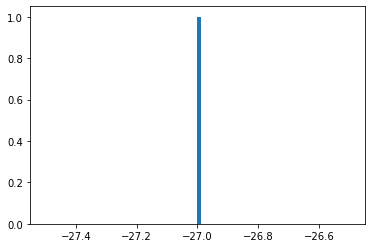

In [36]:

y=(980*64)/(295*24)

def Prob2Score(prob, basePoint, PDO):
    #将概率转化成分数且为正整数
    y = (980*64)/(295*24)
    return int(basePoint+PDO/np.log(2)*(-y))
 
BasePoint, PDO = 100,10
y_hat2 = y_hat.apply(lambda x: Prob2Score(x, BasePoint, PDO))
plt.hist(y_hat2,bins=100)




In [ ]:
def Prob2Score(prob, basePoint, PDO):
    #将概率转化成分数且为正整数
    y = np.log(prob/(1-prob))
    return int(basePoint+PDO/np.log(2)*(-y))
 
BasePoint, PDO = 500,50
testData['score'] = testData['pred'].apply(lambda x: Prob2Score(x, BasePoint, PDO))
plt.hist(testData['score'],bins=100)


In [17]:
confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[980, 295],
       [ 24,  64]])

In [19]:
feature_importance = abs(coefficient_tb_final[coefficient_tb_final.columns[1]])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
score = feature_importance.head(10)
predictors_10 = coefficient_tb_final[coefficient_tb_final.columns[0]].head(10)
feature_importance_table = pd.concat([predictors_10,score], axis=1)
feature_importance_table
feature_importance_table_desc = feature_importance_table.sort_values(by=["Coefficient"],ascending=True)
feature_importance_table_desc

,Predictor,Coefficient
18,LBXMCVSI,10.515433
6,RaceNon-Hispanic White,10.906425
9,RaceOther Race - Including Multi-Racial,11.234259
5,RaceOther Hispanic,17.946590
8,Race6\tNon-Hispanic Asian,20.411446
23,MCQ300B,29.169148
27,MCQ365C,37.217967
26,MCQ365B,57.191963
21,MCQ160D,61.871413
20,LBXSUA,100.000000


In [527]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.inspection import permutation_importance


In [434]:
cvshuffle = ShuffleSplit(n_splits=500, test_size=.25)

fullModel = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
testS = cross_val_score(fullModel, X, y, cv=cvshuffle)
print(np.mean(testS))

0.1293079799950665


In [470]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
 
nmc = 25 

# set up dictionary for grid search
#  dictionary name must now include pipeline function name then __
max_depth = [10,15,20,25,30]
max_features = [3,5,7] 
n_estimators = 100
param_grid={'max_features': max_features,'max_depth': max_depth}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.2,n_splits=nmc,random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])


    rank_test_score  mean_test_score param_max_features param_max_depth
0                 1         0.903355                  3              10
1                 2         0.897855                  5              10
2                 3         0.895032                  7              10
3                 4         0.874757                  3              15
4                 5         0.873621                  5              15
5                 6         0.873474                  7              15
6                 7         0.873144                  3              20
7                 7         0.873144                  5              20
8                15         0.873034                  7              20
9                 7         0.873144                  3              25
10                7         0.873144                  5              25
11               14         0.873071                  7              25
12                7         0.873144                  3         

In [526]:
clf=RandomForestClassifier(max_depth=10,max_features=3)
clf.fit(X,y)
print(clf.score(X_test,y_test))

0.9347028613352898


In [539]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)


AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

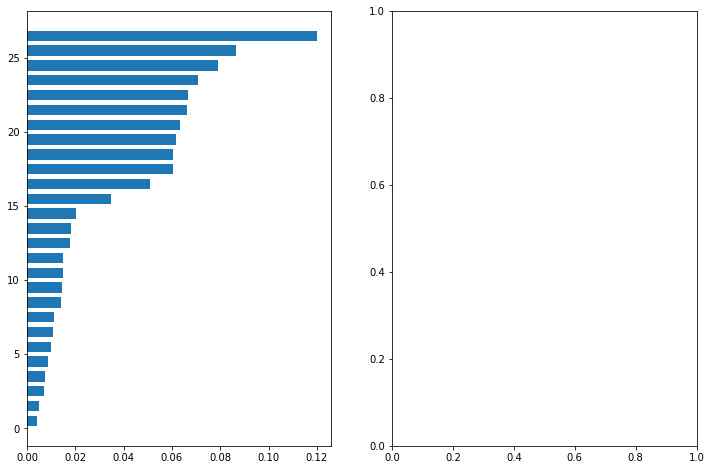

In [537]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X_test.feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_test.feature_names[perm_sorted_idx])
fig.tight_layout()
plt.show()


In [553]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_test.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)
feature_importances = 100.0 * (feature_importances / feature_importances.max())
score = feature_importances.head(15)
print(score)

    importance
1   100.000000
17   65.405533
14   62.902001
19   59.568127
13   55.817199
12   54.554923
18   53.232157
16   51.520885
15   49.876066
10   48.300179
11   43.318957
25   26.122905
20   18.081586
8    16.347360
9    16.245219


In [554]:
index=[1,17,14,19,13,12,18,16,15,10,11,25,20,8,9]
for i in index:
    print(df2.columns[i])

Age
LBXSCR
LBDTCSI
MCQ160D
avgDI
avgSY
LBXSUA
LBXMCVSI
AI
BMXBMI
BPXPLS
MCQ365C
MCQ300A
DIQ010Yes
DIQ010No
